In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from settings import BASE_DIR

/home/paridhi/AARC/Projects/carla_simulations


In [4]:


def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data as a DataFrame.
    """
    full_path = f"{BASE_DIR}/{file_path}"
    df = pd.read_csv(full_path)
    return df

In [198]:
# load recorded data
data = load_data("Reports/sim_data_FS_nV_4_ref30.csv")
data.head(10)

,time,name,x,y,z,speed,acc,gap,command_velocity,reference_speed
0,0.12,leader,9500.000000,-4.5,0.499931,0.025951,0.000,NaN,NaN,NaN
1,0.12,follower_0,9508.000000,-4.5,0.499931,0.025951,0.000,3.400000,0.0,2.0
2,0.12,follower_1,9516.000000,-4.5,0.499931,0.025951,0.000,3.400000,0.0,2.0
3,0.12,follower_2,9524.000000,-4.5,0.499931,0.025951,0.000,3.400000,0.0,2.0
4,0.12,follower_3,9532.000000,-4.5,0.499931,0.025951,0.000,3.400000,0.0,2.0
5,0.12,follower_4,9540.000000,-4.5,0.499931,0.025951,0.000,3.400000,0.0,2.0
6,0.22,leader,9499.995117,-4.5,0.498987,0.436624,-43.389,NaN,NaN,NaN
7,0.22,follower_0,9508.000000,-4.5,0.498987,0.096194,0.000,3.404883,0.0,2.0
8,0.22,follower_1,9516.000000,-4.5,0.498987,0.096194,0.000,3.400000,0.0,2.0
9,0.22,follower_2,9524.000000,-4.5,0.498987,0.096194,0.000,3.400000,0.0,2.0


In [199]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


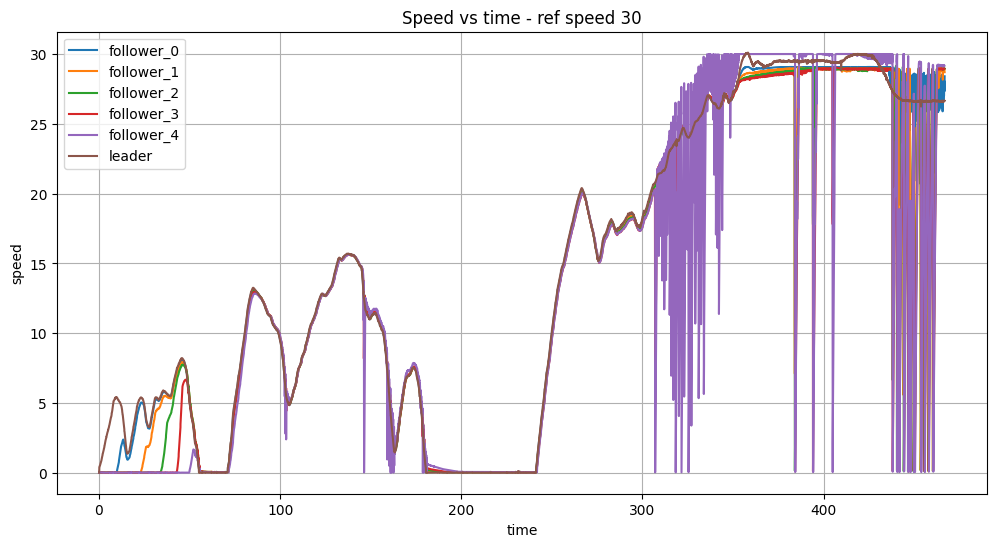

In [201]:
plot_speed(data,'time','speed','Speed vs time - ref speed 30', max_points=28000,min_points=0)

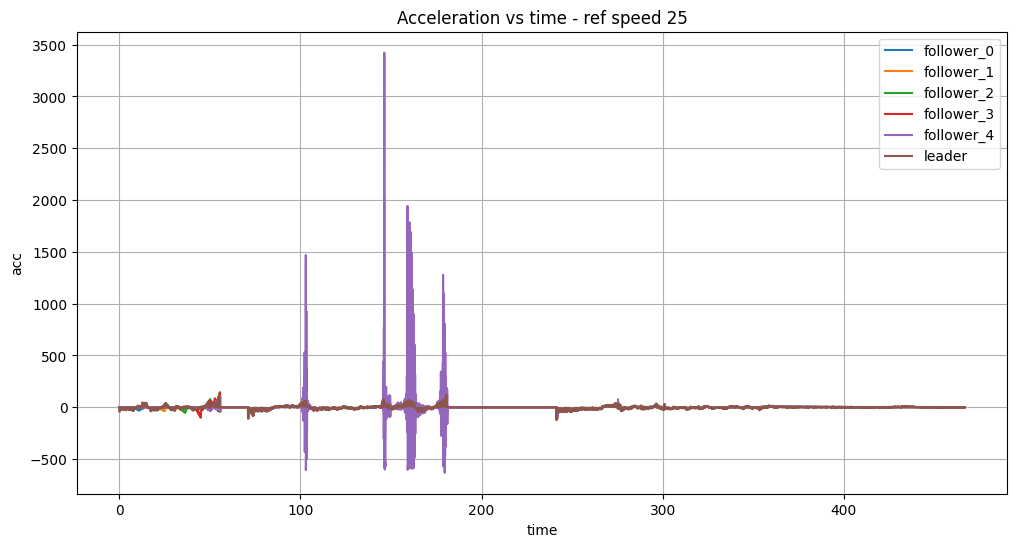

In [197]:
plot_speed(data,'time','acc','Acceleration vs time - ref speed 25', max_points=28000,min_points=0)

In [175]:
# check if any record in gap column is  zero
zero_gap_records = data[data['gap'] == 0]
print(f"Number of records with zero gap: {len(zero_gap_records)}")

Number of records with zero gap: 0


In [176]:
# minimum gap value
min_gap = data['gap'].min()
print(f"Minimum gap value: {min_gap}")

Minimum gap value: 3.4000000000000004


In [177]:
# maximum gap value
max_gap = data['gap'].max()
print(f"Maximum gap value: {max_gap}")

Maximum gap value: 367.3346008300781


In [178]:
# check when leader speed is zero, what are the gap values for the next 50 records
leader_zero_gap = data[data['speed'] == 0]['gap']
print(f"Gap values when leader speed is zero: {leader_zero_gap.tolist()}")

Gap values when leader speed is zero: []


In [179]:
# minimum speed value
min_speed = data['speed'].min()
print(f"Minimum speed value: {min_speed}")

Minimum speed value: 4.223603246623572e-05


In [180]:
# maximum speed value
max_speed = data['speed'].max()
print(f"Maximum speed value: {max_speed}")

Maximum speed value: 31.250358742131287


In [181]:


# get zero acceleration values of follower vehicle
zero_acceleration = data[data['speed'] == 0.0][['name','time', 'speed', 'acc', 'gap']]
print(f"Number of records with zero acceleration: {len(zero_acceleration)}")
print("Records with zero acceleration:")
zero_acceleration.head()

Number of records with zero acceleration: 0
Records with zero acceleration:


,name,time,speed,acc,gap


In [182]:
# minimum gap
min_gap = data[data['name']=='follower_5'][['gap']].min()
print(f"Minimum Gap value: {min_gap}")

Minimum Gap value: gap   NaN
dtype: float64


## Plot follower gaps

In [183]:
# plot follower_5 gap distribution for first nth records
# def plot_gap_distribution(data: pd.DataFrame,follower_name: str, n: int = None):
#     follower_gap_data = data[data['name'] == follower_name][['gap']]
#     if n:
#         follower_gap_data = follower_gap_data.iloc[:n]
#     plt.figure(figsize=(10, 6))
#     plt.plot(follower_gap_data['gap'], color='blue')
#     plt.title('Gap Distribution for Follower 5')
#     plt.xlabel('Gap (meters)')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

def plot_gap_over_time(data: pd.DataFrame, follower_name: str, n: int = None):
    follower_gap_data = data[data['name'] == follower_name][['time', 'gap']]
    leader_data = data[data['name'] == 'leader'][['time', 'speed']]
    if n:
        follower_gap_data = follower_gap_data.iloc[:n]
        leader_data = leader_data.iloc[:n]
    plt.figure(figsize=(10, 6))
    plt.plot(follower_gap_data['time'], follower_gap_data['gap'], color='blue')
    plt.plot(leader_data['time'], leader_data['speed'], color='red', label='Leader Gap', linewidth=2)
    plt.title(f'Gap Over Time for {follower_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Gap (meters)')
    plt.legend()
    plt.grid(True)
    plt.show()

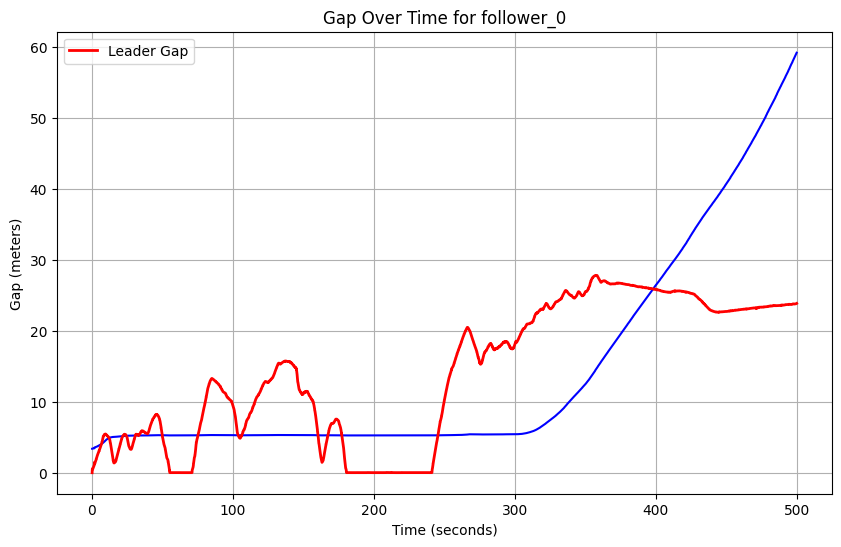

In [184]:
plot_gap_over_time(data, 'follower_0', n=5000)

# Plot command velocity vs gap distribution


In [185]:
def plot_command_velocity(data: pd.DataFrame, max_points: int = 1000, min_points: int = 0):

    # data = data.head(max_points)  # Limit to max_points for clarity
    # filter follower vehicles only
    data = data[data['name'] != 'leader']
    data = data.iloc[min_points:max_points]  # Start from min_points if specified
    plt.figure(figsize=(12, 6))
    for label, group in data.groupby('name'):
        if label != 'follower_2':
            if label == 'follower_0':
                data['command_velocity'] = data['command_velocity'] * 1.5
            else:
                data['command_velocity'] = data['command_velocity']
            plt.plot(group['time'], group['command_velocity'], label=f'cmd velocity {label}',)
            plt.plot(group['time'], group['reference_speed'], linestyle='--', alpha=0.5 , label=f'Reference Speed - {label}')
            plt.plot(group['time'], group['gap'], linestyle=':', alpha=0.5 , label=f'Gap - {label}')
    
    plt.title('Command Velocity vs Gap')
    plt.xlabel('Time (m)')
    plt.ylabel('Command Velocity (m/s)')
    plt.grid(True)
    plt.legend()
    # plt.xlim(0, data['gap'].max() + 5)
    # plt.ylim(0, data['speed'].max() + 5)
    plt.show()

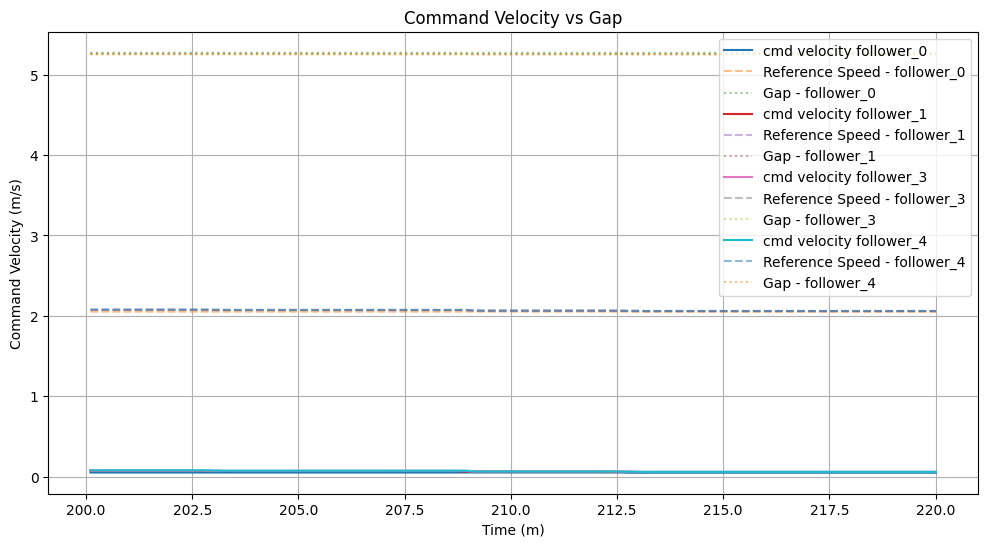

In [186]:
plot_command_velocity(data,11000,10000)

In [187]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_follower = data[data['name'] != 'leader']['speed'].max()
min_speed_follower = data[data['name'] != 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_follower:.3f} m/s")
print(f"Minimum speed value of follower vehicle: {min_speed_follower:.3f} m/s")


Maximum speed value of follower vehicle: 19.999 m/s
Minimum speed value of follower vehicle: 0.019 m/s


In [188]:
# Get the maximum speed value of follower vehicles only (excluding leader)
max_speed_leader = data[data['name'] == 'leader']['speed'].max()
min_speed_leader = data[data['name'] == 'leader']['speed'].min()

print(f"Maximum speed value of follower vehicle: {max_speed_leader:.3f} m/s")
print(f"Minimum speed value of leader vehicle: {min_speed_leader:.3f} m/s")

Maximum speed value of follower vehicle: 31.250 m/s
Minimum speed value of leader vehicle: 0.000 m/s


## Plot speed and time graph

In [189]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


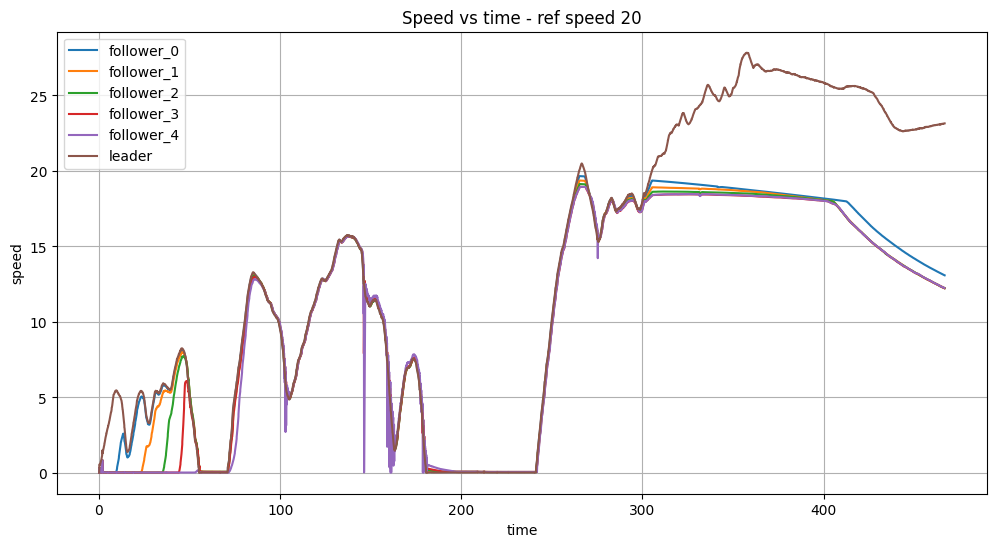

In [190]:
plot_speed(data,'time','speed','Speed vs time - ref speed 20', max_points=28000,min_points=0)

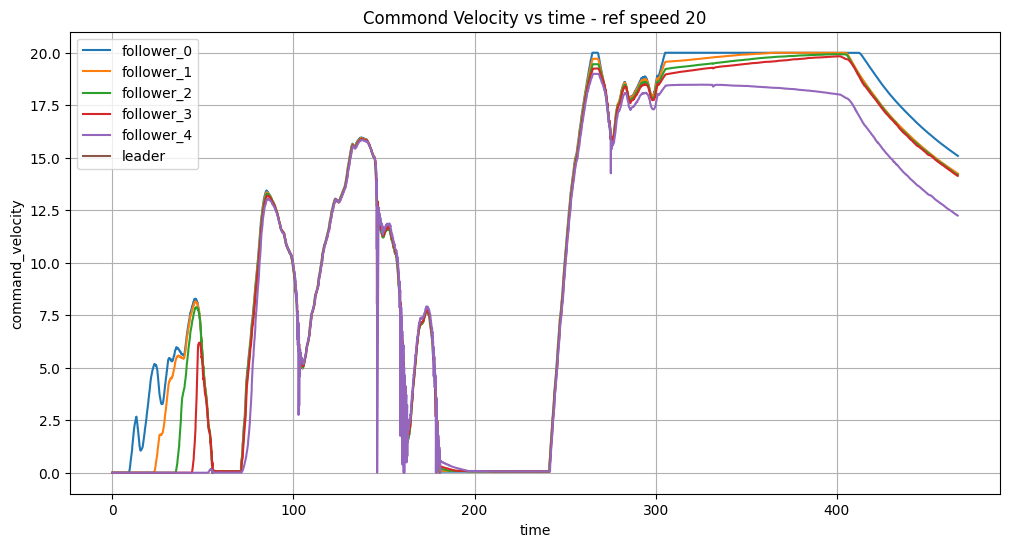

In [191]:
plot_speed(data,'time','command_velocity','Commond Velocity vs time - ref speed 20', max_points=28000,min_points=0)

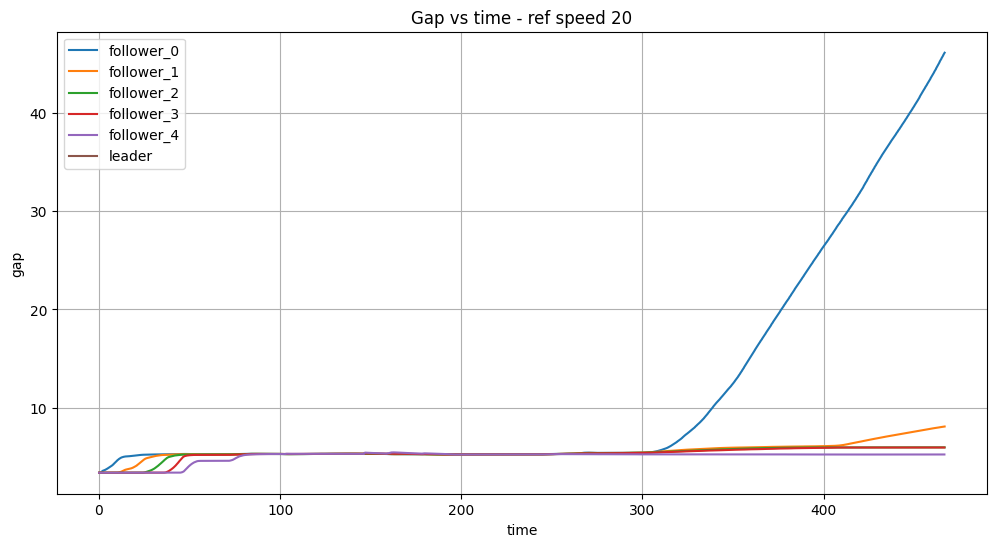

In [192]:
plot_speed(data,'time','gap','Gap vs time - ref speed 20', max_points=28000,min_points=0)

In [ ]:
def plot_speed(df,x_col,y_col,title, max_points: int = 1000,min_points: int = 0):
    df = df.iloc[min_points:max_points]  # Limit to max_points for clarity
    plt.figure(figsize=(12, 6))

    for label, group in df.groupby('name'):
        plt.plot(group[x_col], group[y_col], label=label,)
    
    # plt.plot(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

In [206]:


def plot_follower_speed_profile(df, num_follower, follower, max_points: int = None, min_points: int = 0):
    
    # Slice the data range
    if follower !='leader':
        for i in range(num_follower+1):
            follower_name = f"follower_{i}"
        
            if i <= 0:
                imm_leader_name = 'leader'
                # leader_data = df[df['name'] == 'leader']
            else:
                imm_leader_name = f'follower_{i-1}'
            
            leader_data = df[df['name'] == imm_leader_name]
            # amplify the leader speed for better visualization
            # leader_data['speed'] = leader_data['speed'] * 1.2
            
            follower_data = df[df['name'] == follower_name]
            
            if follower_data.empty:
                print(f"[Warning] No data found for follower: {follower_name}")
                return
            if max_points is not None:
                follower_data = follower_data.iloc[min_points:max_points]
                leader_data = leader_data.iloc[min_points:max_points]
                # immediate_leader = 
            else:
                follower_data = follower_data.iloc[min_points:]

            plt.figure(figsize=(10, 6))
            
            plt.plot(leader_data['time'], leader_data['speed'], label=f'{imm_leader_name} Speed', color='red',linewidth=3)
            plt.plot(follower_data['time'], follower_data['speed'], label=follower_name)
            # plt.plot(follower_data['time'], follower_data['command_velocity'], label=f"{follower_name} Command Velocity", linestyle='--')
            plt.plot(follower_data['time'], follower_data['reference_speed'], label=f"{follower_name} Reference Velocity", linestyle=':')
            plt.plot(follower_data['time'], follower_data['gap'], label=f"{follower_name} Gap", linestyle='-.')
            plt.xlabel('Time (s)')
            plt.ylabel('Speed (m/s)')
            if i<=0:
                plt.title(f'Speed Profile of {follower_name} and leader {imm_leader_name}')
            else:
                plt.title(f'Speed Profile of follower_{i+1} and leader {i}')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
    else:
        follower_name = 'leader'
        follower_data = df[df['name'] == follower_name]
        if follower_data.empty:
            print(f"[Warning] No data found for follower: {follower_name}")
            return
        if max_points is not None:
            follower_data = follower_data.iloc[min_points:max_points]
        else:
            follower_data = follower_data.iloc[min_points:]

        plt.figure(figsize=(10, 6))
        
        plt.plot(follower_data['time'], follower_data['speed'], label=follower_name, color='red')
        plt.xlabel('Time (s)')
        plt.ylabel('Speed (m/s)')
        plt.title(f'Speed Profile of {follower_name}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


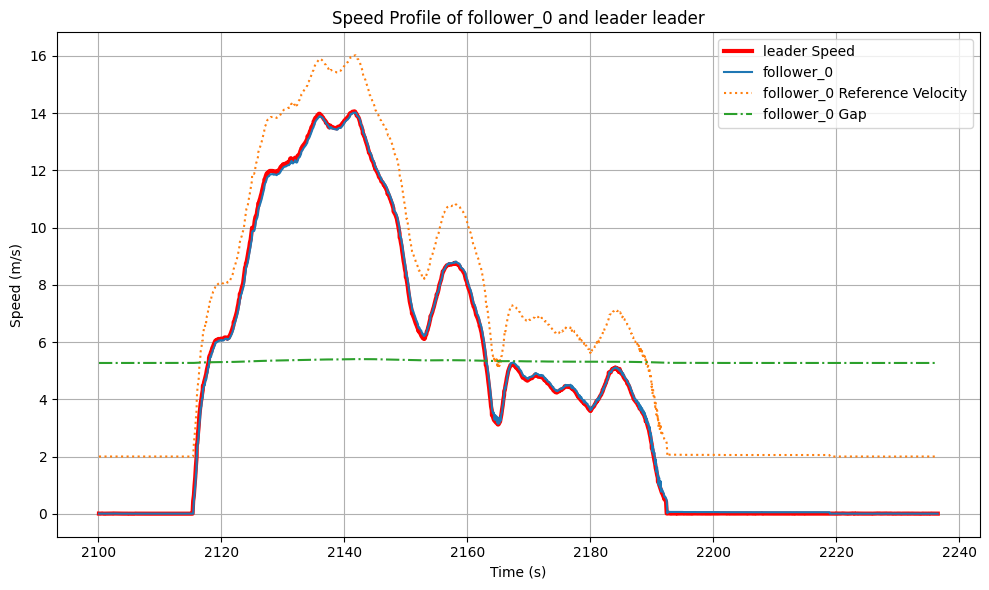

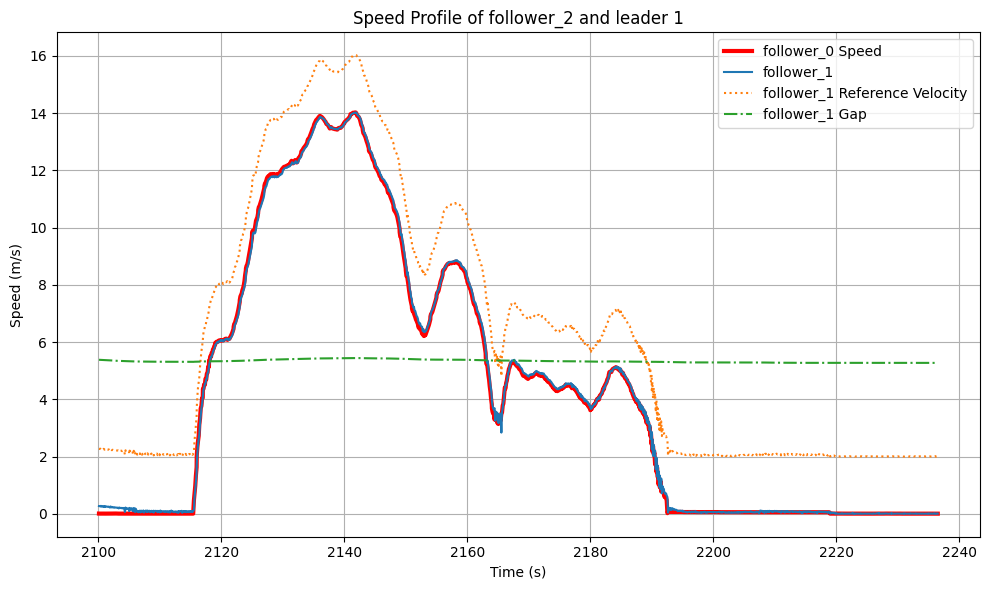

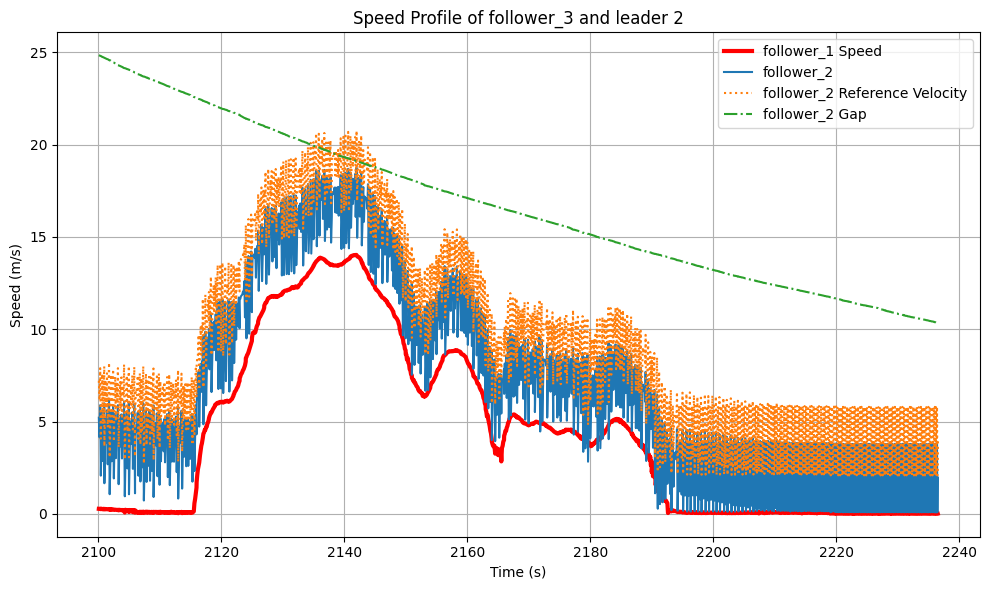

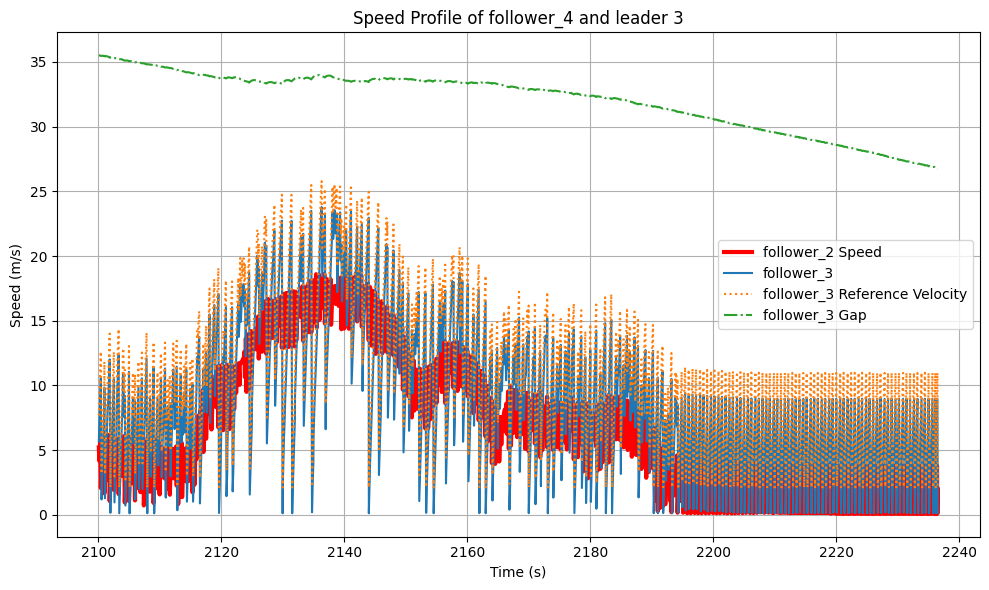

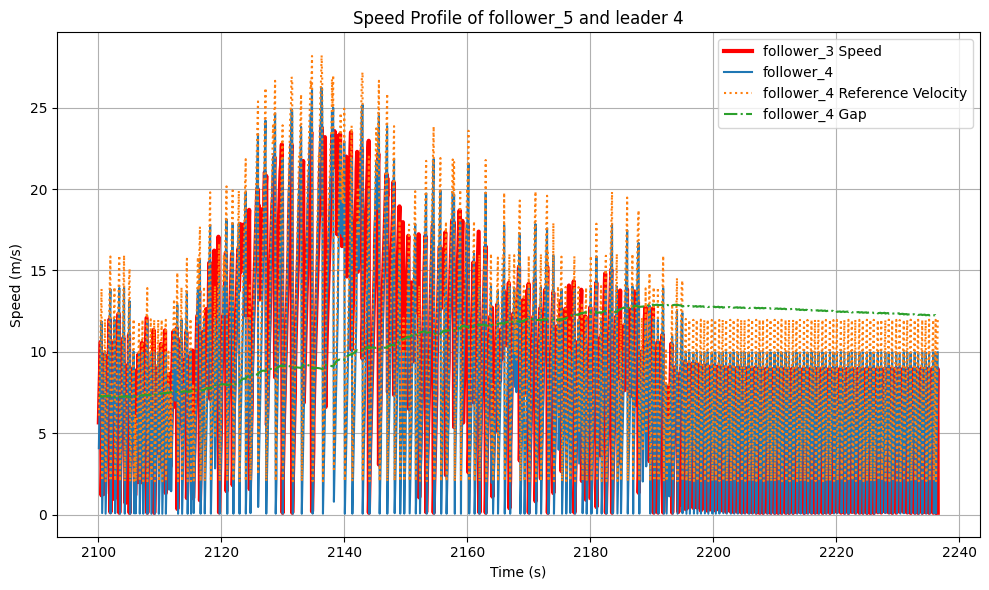

[Warning] No data found for follower: follower_5


In [ ]:
plot_follower_speed_profile(data, num_follower=8, follower='follower', max_points=25000,min_points=21000)

## Plot gap between vehicles

In [167]:
def plot_gap_over_time(data: pd.DataFrame, follower: str, max_points, min_points):
    follower_gap_data = data[data['name'] != 'leader']
    # leader_data = data[data['name'] == 'leader'][['time', 'speed']]
    plt.figure(figsize=(10, 6))
    if max_points:
        follower_gap_data = follower_gap_data.iloc[min_points:max_points]
        for idx, (name, group) in enumerate(follower_gap_data.groupby('name')):
            plt.plot(group['time'], group['gap'], label=name, linewidth=1)

    plt.title(f'Gap Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Gap (meters)')
    plt.legend()
    plt.grid(True)
    plt.show()

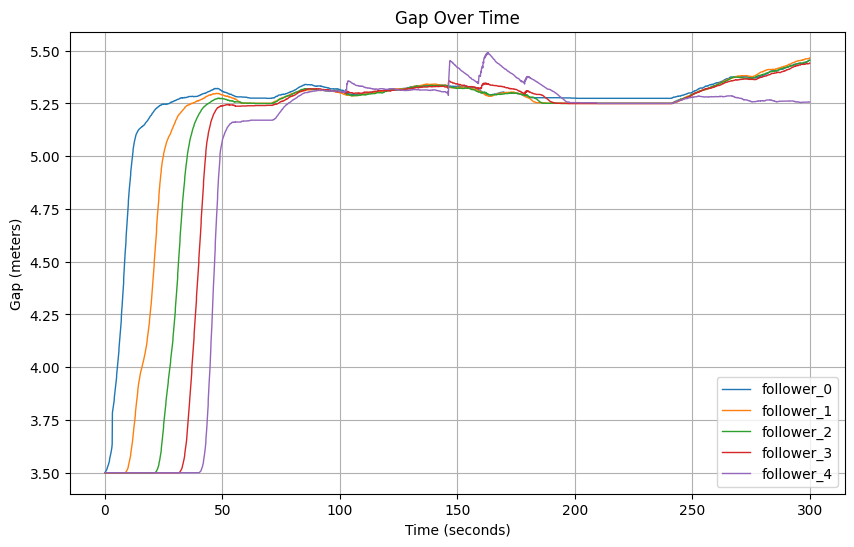

In [169]:
plot_gap_over_time(data, 'follower', max_points=15000,min_points=0)